In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
DATA_FOLDER_PATH = os.getcwd() + '/data/KS VERI/CHILLER/'

In [5]:
FILE_NAME = 'CHILLER ve MEKANİK ROOM (Kwh).xlsx'

In [6]:
PATH = DATA_FOLDER_PATH + FILE_NAME

In [7]:
ALL_DFS = []
for i in range(1, 21):
    sheet_name = 'Sheet' + str(i)
    
    if i == 1:
        df = pd.read_excel(PATH, sheet_name=sheet_name, skiprows=29, usecols='C:R', header=None)
        df.drop(df.columns[[1,3,4,5,7,8,10,12,13,15]], axis=1, inplace=True)
    else:
        df = pd.read_excel(PATH, sheet_name=sheet_name, skiprows=5, usecols='C:J', header=None)
        df.drop(df.columns[[2,3]], axis=1, inplace=True)
    
    df.columns = [0, 1, 2, 3, 4, 5]
    
    ALL_DFS.append(df)
    
df = pd.concat(ALL_DFS, ignore_index=True)

df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)
df.reset_index(drop=True, inplace=True)

dates = []
drop_indexes = []

current_month_year = df.columns[0].split('\n')[0][9:]
for row in df.itertuples():
    
    if row[1] == 'Period Totals':
        drop_indexes.append(row[0])
        continue
        
    elif row[1].startswith('Period'):
        current_month_year = row[1].split('\n')[0][9:]
        drop_indexes.append(row[0])
        
    else:
        day = row[1]
        str_date = f'{day} {current_month_year}'

        # convert into datetime object
        # date is like "1 January 2023"
        date = pd.to_datetime(str_date, format='%d %B %Y').date()
        dates.append(date)
        
df.drop(drop_indexes, inplace=True)
# drop the first column
df.drop(df.columns[0], axis=1, inplace=True)
df.insert(0, 'Date', dates)

# sort the dataframe by date
df.sort_values(by='Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,CHILLER_SIM.01_EA,CHILLER_SIM.02_EA,EMCC.POMPA_ODASI,SIM.CHILLER3,Interval Total
0,2022-03-01,57.33144,51.839829,66.89453,18.340853,194.406652
1,2022-03-02,599.454744,682.311792,582.216772,1616.721852,3480.70516
2,2022-03-03,599.454744,682.311791,623.968714,1616.721853,3522.457102
3,2022-03-04,599.454744,682.311792,623.968714,1616.721852,3522.457102
4,2022-03-05,599.454744,682.311791,623.968714,1616.721853,3522.457102
...,...,...,...,...,...,...
598,2023-10-25,3051.125,76.875,542.71875,112.75,3783.46875
599,2023-10-26,2557.25,0,548.8125,985.5,4091.5625
600,2023-10-27,1972.375,0,547.375,1743,4262.75
601,2023-10-28,2398.75,0,550.90625,962.5,3912.15625


In [8]:
# create a list of dates from first date to last date
all_dates = [date.date() for date in
             pd.date_range(start=df['Date'].iloc[0],
                           end=df['Date'].iloc[-1]).tolist()]

# find the lost dates
lost_dates = [date for date in all_dates if date not in df['Date'].tolist()]
for date in lost_dates:
    print(date)

2023-08-09
2023-08-10
2023-08-11
2023-08-12
2023-08-13


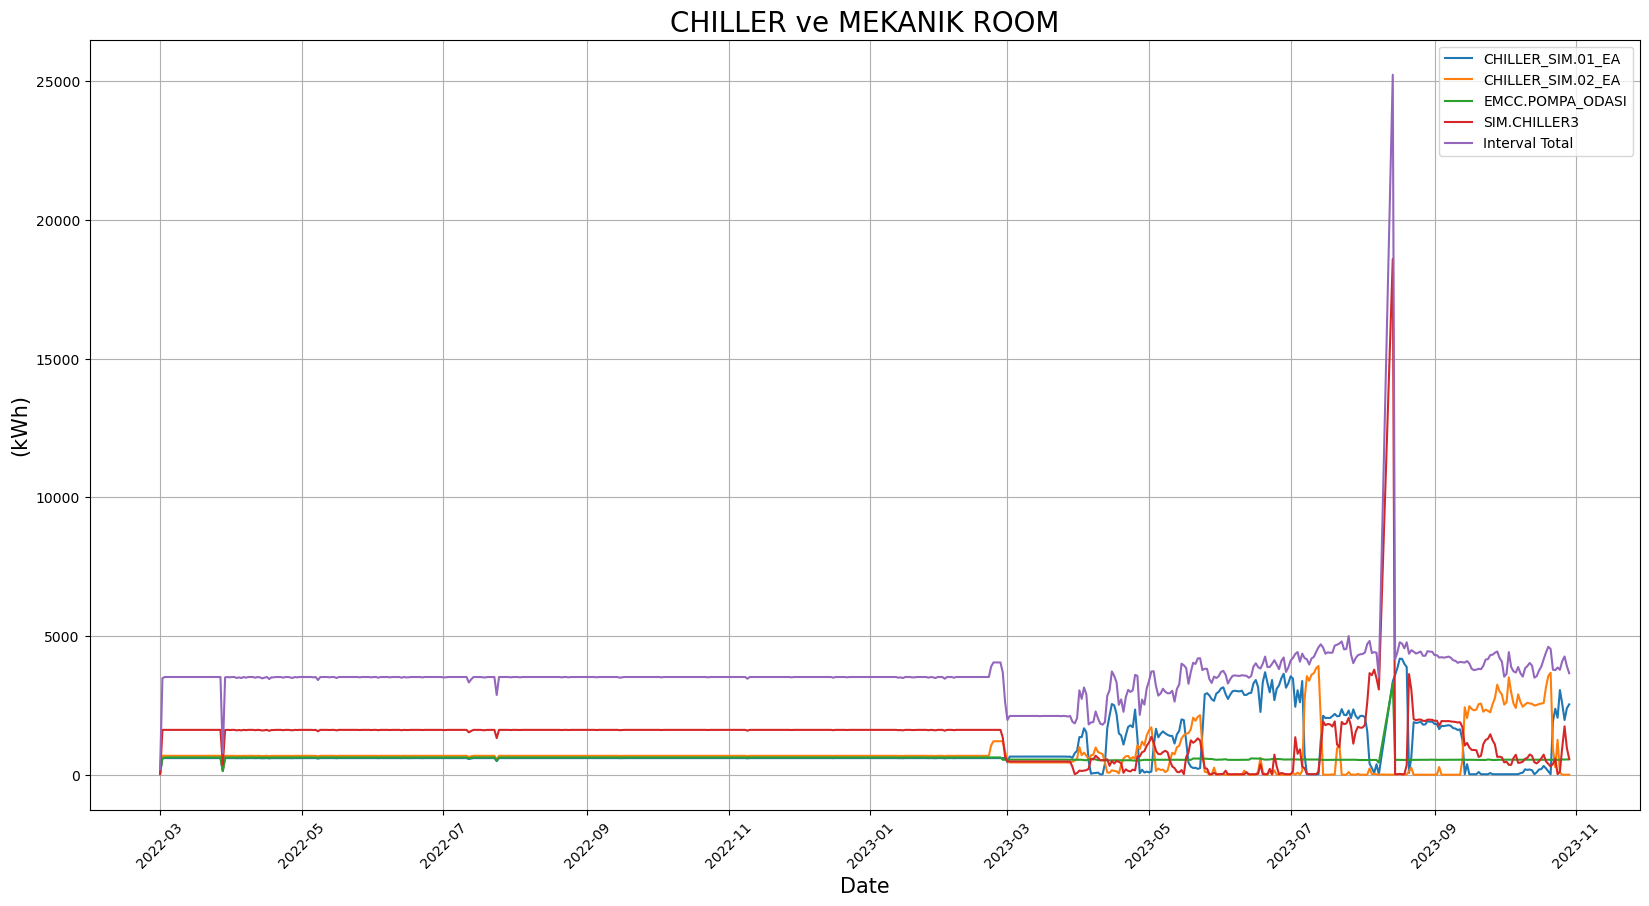

In [9]:
# plot the data with plt library
plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df[df.columns[1:]], label=df.columns[1:])

plt.xlabel('Date', fontsize=15)
plt.ylabel('(kWh)', fontsize=15)
plt.title('CHILLER ve MEKANIK ROOM', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [11]:
# save the dataframe as csv file
df.to_csv(os.getcwd() + '/data/KS VERI/CLEAN_DATA/CHILLER_ve_MEKANİK_ROOM.csv', index=False)

In [12]:
# FİND MAX AND MIN VALUES AND THEIR DATES

In [13]:
# find the max values of all columns
max_values = df[df.columns[1:]].max()
max_values

0
CHILLER_SIM.01_EA       4182.75
CHILLER_SIM.02_EA        3920.5
EMCC.POMPA_ODASI      3278.6875
SIM.CHILLER3           18592.25
Interval Total       25232.9375
dtype: object

In [14]:
# find their dates
max_dates = []
for column in df.columns[1:]:
    max_date = df[df[column] == df[column].max()]['Date'].iloc[0]
    max_dates.append(max_date)
max_dates

[datetime.date(2023, 8, 17),
 datetime.date(2023, 7, 13),
 datetime.date(2023, 8, 14),
 datetime.date(2023, 8, 14),
 datetime.date(2023, 8, 14)]